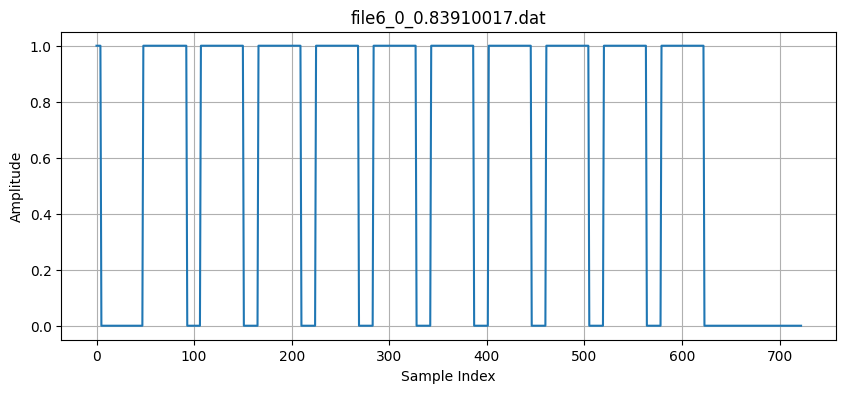

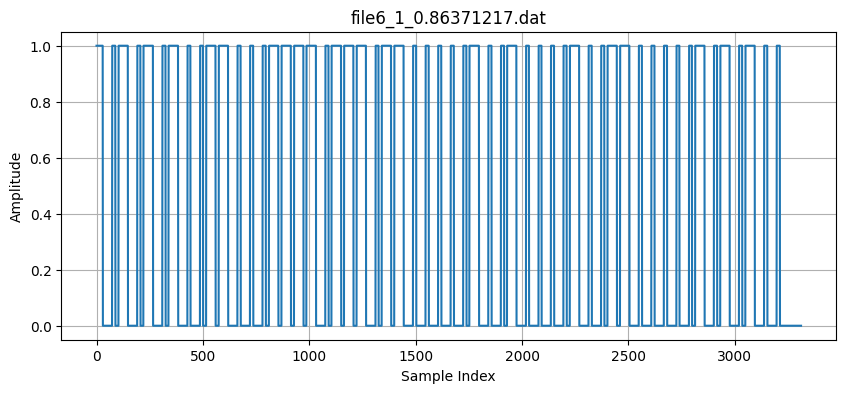

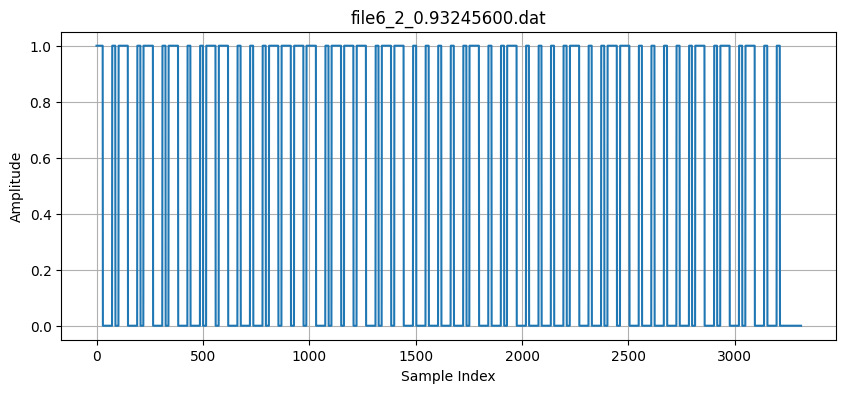

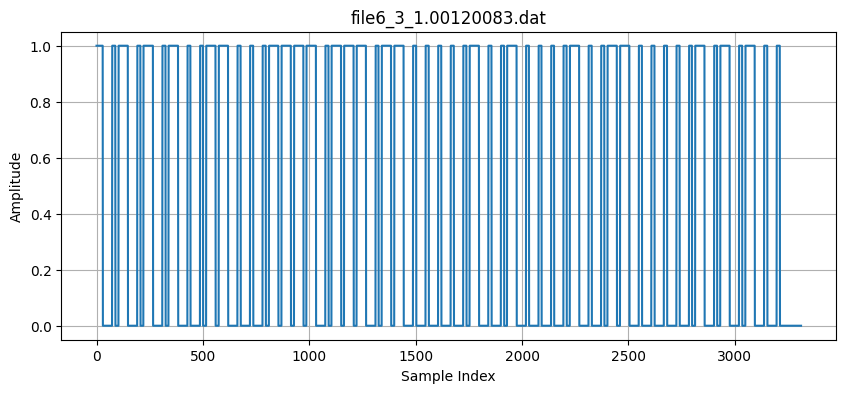

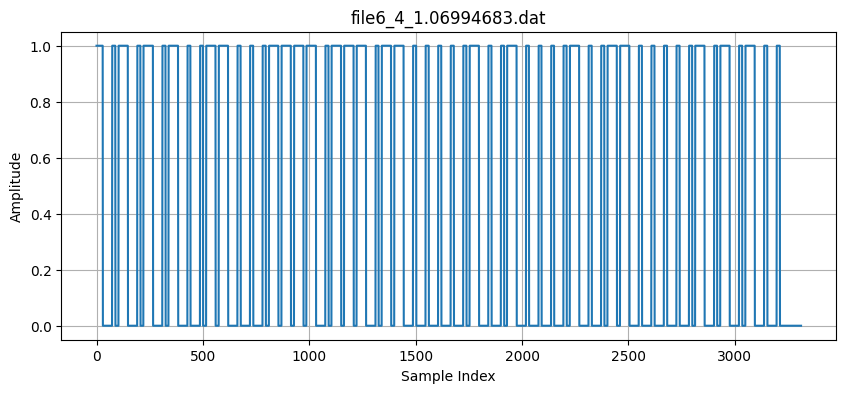

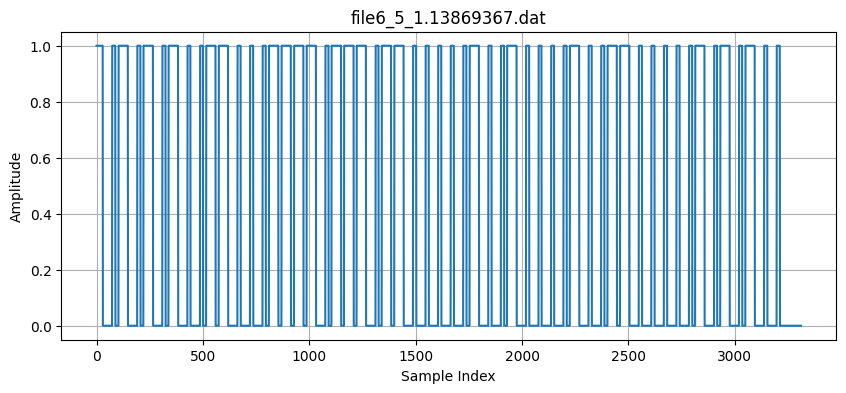

In [20]:
import numpy as np
import glob
import matplotlib.pyplot as plt

decimation_factor = 100 # smaller so we see bits

data_files = glob.glob("*.dat")

for file in data_files:
    data = np.fromfile(open(file), dtype=np.float32)
    data_decimate = data[::decimation_factor]

    plt.figure(figsize=(10,4))
    plt.plot(data_decimate)
    plt.title(file)
    plt.xlabel("Sample Index")
    plt.ylabel("Amplitude")
    plt.grid()
    plt.show()


In [12]:
import numpy as np

def decode_bits(file_path, sampling_rate):
    # Load the thresholded data (assuming float32/binary format)
    data = np.fromfile(file_path, dtype=np.float32)
    
    # 1. Detect rising edges (where signal goes from 0 to 1)
    # We look for where the difference between samples is positive
    diff = np.diff(data)
    rising_edges = np.where(diff > 0.5)[0]
    
    # 2. Calculate distances between consecutive rising edges (the periods)
    periods = np.diff(rising_edges)
    
    # 3. Determine a threshold for "Short" vs "Long"
    # Based on your graphs, a value right in the middle of the two sizes works best
    if len(periods) > 0:
        threshold = (np.max(periods) + np.min(periods)) / 2
    else:
        return "No pulses detected."

    # 4. Extract the bits
    binary_sequence = "".join(['1' if p > threshold else '0' for p in periods])
    
    return binary_sequence, periods

# Example usage
bits, timings = decode_bits('file6_1_0.86371217.dat', 6000000)
print(f"Decoded Sequence: {bits}")

Decoded Sequence: 01010100010000011010100110100100100101000100100101011


In [13]:
import numpy as np
import glob
import os

def decode_file(file_path):
    # 1. Load the thresholded binary data
    # Standard GNU Radio .dat files are typically float32
    try:
        data = np.fromfile(file_path, dtype=np.float32)
    except Exception as e:
        return f"Error reading file: {e}"

    # 2. Find rising edges (0 to 1 transitions)
    # We look for where the difference between samples is positive
    diff = np.diff(data)
    rising_edges = np.where(diff > 0.5)[0]

    # 3. Calculate the time (in samples) between each rising edge
    periods = np.diff(rising_edges)

    if len(periods) == 0:
        return "No pulses found"

    # 4. Determine Threshold for Pulse Interval Encoding
    # Short periods = 0, Long periods = 1
    # We use the average of the min and max period found in this specific file
    threshold = (np.min(periods) + np.max(periods)) / 2

    # 5. Convert periods to a bitstring
    bits = "".join(['1' if p > threshold else '0' for p in periods])
    
    return bits

# --- Main Loop ---

# This pattern finds all files starting with 'file6_' and ending in '.dat'
file_pattern = "file6_*.dat"
data_files = sorted(glob.glob(file_pattern))

print(f"Found {len(data_files)} files to process.\n")

for f in data_files:
    # Get just the filename for cleaner printing
    short_name = os.path.basename(f)
    
    result = decode_file(f)
    
    print(f"--- File: {short_name} ---")
    
    # Check if it's a preamble (mostly the same bit repeating)
    if result.count(result[0]) == len(result):
        print(f"Type: Potential Preamble")
    else:
        print(f"Type: Data Segment")
        
    print(f"Decoded Bits: {result}\n")

Found 6 files to process.

--- File: file6_0_0.83910017.dat ---
Type: Data Segment
Decoded Bits: 010101010

--- File: file6_1_0.86371217.dat ---
Type: Data Segment
Decoded Bits: 01010100010000011010100110100100100101000100100101011

--- File: file6_2_0.93245600.dat ---
Type: Data Segment
Decoded Bits: 01010100111000011000100110100100101001100101010101011

--- File: file6_3_1.00120083.dat ---
Type: Data Segment
Decoded Bits: 01010100011001011001101110100110101001101101010101010

--- File: file6_4_1.06994683.dat ---
Type: Data Segment
Decoded Bits: 01010110110100111001101101100110110101101101100101010

--- File: file6_5_1.13869367.dat ---
Type: Data Segment
Decoded Bits: 01010110111001101001101101100110111001000111010101011

